In [1]:
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Latitude & Longitude input
latitude = "37.4219999"
longitude = "-122.0840575"

location = geolocator.reverse(f"{latitude}, {longitude}")

print(location.address)


Amphitheatre Parkway, Mountain View, Santa Clara County, California, 94043, United States


In [2]:
import pandas as pd
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# Create a DataFrame with the latitude and longitude
df = pd.DataFrame({
    'latitude': [41.817229156],
    'longitude': [-87.637328162]
})

# Define a function to reverse geocode
def reverse_geocode(lat, lon):
    location = geolocator.reverse(f"{lat}, {lon}")
    return location.address

# Apply the function to the DataFrame
df['address'] = df.apply(lambda row: reverse_geocode(row['latitude'], row['longitude']), axis=1)

# Show the DataFrame with the address
print(df)


    latitude  longitude                                            address
0  41.817229 -87.637328  428, West 42nd Place, Canaryville, New City, C...


In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Step 1: Load the CSV Data
data = {
    "Latitude": [41.765282, 41.865156, 41.907251],
    "Longitude": [-87.583655, -87.713732, -87.725224]
}

df = pd.DataFrame(data)

# Step 2: Download and Load the Chicago Wards Shapefile
# Assuming you have the shapefile downloaded and it's named 'chicago_wards.shp'
wards = gpd.read_file("Boundaries_-_Wards")

# Step 3: Convert Latitude and Longitude to Geometric Points
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Ensure both dataframes are in the same coordinate reference system (CRS)
geo_df.set_crs(epsg=4326, inplace=True)  # WGS84 Lat/Long
wards = wards.to_crs(epsg=4326)  # Convert to the same CRS as the points

# Step 4: Perform the Spatial Join to Get Ward Information
result = gpd.sjoin(geo_df, wards, how="left", op="within")

# Display the result
print(result[["Latitude", "Longitude", "ward"]])


    Latitude  Longitude  ward
0  41.765282 -87.583655   7.0
1  41.865156 -87.713732  24.0
2  41.907251 -87.725224  26.0


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [4]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Step 1: Load the CSV Data
data = {
    "Latitude": [41.765282, 41.865156, 41.907251],
    "Longitude": [-87.583655, -87.713732, -87.725224]
}

df = pd.DataFrame(data)

# Step 2: Load the Chicago Wards Shapefile
# Assuming you have the shapefile extracted and it's named 'chicago_wards.shp'
wards = gpd.read_file("Boundaries_-_Wards__2023-__20240813.csv")

# Step 3: Convert Latitude and Longitude to Geometric Points
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS for the geo_df (WGS84 - commonly used for latitude and longitude)
geo_df.set_crs(epsg=4326, inplace=True)

# Make sure the wards shapefile is also in WGS84 CRS
wards = wards.to_crs(epsg=4326)

# Step 4: Perform the Spatial Join to Get Ward Information
result = gpd.sjoin(geo_df, wards, how="left", predicate="within")

# Display the result
print(result[["Latitude", "Longitude", "ward"]])


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [ ]:
import pandas as pd

# Load the CSV file
wards_csv = pd.read_csv("Boundaries_-_Wards__2023-__20240813.csv")

# Display the first few rows
wards_csv.head()


In [ ]:
wards_csv.info()

In [ ]:
wards_csv.columns

In [ ]:
import geopandas as gpd
from shapely import wkt

# Convert the_geom column to shapely geometries
wards_csv['geometry'] = wards_csv['the_geom'].apply(wkt.loads)


In [ ]:
# Create GeoDataFrame
wards_gdf = gpd.GeoDataFrame(wards_csv, geometry='geometry')

# Set the CRS - Assuming WGS84 (you can adjust if your data is in a different CRS)
wards_gdf.set_crs(epsg=4326, inplace=True)


In [ ]:
from shapely.geometry import Point

# Your coordinates
data = {
    "Latitude": [41.765282, 41.865156, 41.907251],
    "Longitude": [-87.583655, -87.713732, -87.725224]
}

df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS for geo_df
geo_df.set_crs(epsg=4326, inplace=True)

# Perform the Spatial Join
result = gpd.sjoin(geo_df, wards_gdf, how="left", predicate="within")

# Display the result
print(result[["Latitude", "Longitude", "Ward"]])


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

# Load the CSV file with ward data
wards_csv = pd.read_csv("Boundaries_-_Wards__2023-__20240813.csv")

# Parse the geometry column
wards_csv['geometry'] = wards_csv['geometry'].apply(wkt.loads)
wards_gdf = gpd.GeoDataFrame(wards_csv, geometry='geometry')

# Set CRS - Assuming WGS84 (change if needed)
wards_gdf.set_crs(epsg=4326, inplace=True)

# Create a GeoDataFrame for the point
coordinate = Point(-87.583655, 41.765282)  # Longitude, Latitude order
point_gdf = gpd.GeoDataFrame(geometry=[coordinate], crs="EPSG:4326")

# Perform spatial join
result = gpd.sjoin(point_gdf, wards_gdf, how="left", predicate="within")

# Display the result
print(result[['geometry', 'Ward']])


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

# Load the CSV file with ward data
wards_csv = pd.read_csv("Boundaries_-_Wards__2023-__20240813.csv")

# Parse the geometry column
wards_csv['geometry'] = wards_csv['geometry'].apply(wkt.loads)
wards_gdf = gpd.GeoDataFrame(wards_csv, geometry='geometry')

# Set CRS - Assuming WGS84 (change if needed)
wards_gdf.set_crs(epsg=4326, inplace=True)

# Your coordinates
data = {
    "Latitude": [41.765282, 41.865156, 41.907251],
    "Longitude": [-87.583655, -87.713732, -87.725224]
}

df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS for geo_df
geo_df.set_crs(epsg=4326, inplace=True)

# Perform the Spatial Join
result = gpd.sjoin(geo_df, wards_gdf, how="left", predicate="within")

# Display the result
print(result[["Latitude", "Longitude", "Ward"]])


In [ ]:
import pandas as pd

# Load the CSV file
wards_csv = pd.read_csv("Boundaries_-_Wards__2023-__20240813.csv")

# Print the column names to verify
print(wards_csv.columns)


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point

# Load the CSV file with ward data
wards_csv = pd.read_csv("Boundaries_-_Wards__2023-__20240813.csv")

# Inspect the dataset to find the correct column name for geometry
print(wards_csv.columns)

# Assuming the geometry column is named 'geometry' or similar
# If it is named differently, adjust this line
if 'geometry' not in wards_csv.columns:
    if 'the_geom' in wards_csv.columns:
        wards_csv['geometry'] = wards_csv['the_geom'].apply(wkt.loads)
    else:
        raise KeyError("No suitable geometry column found")
else:
    wards_csv['geometry'] = wards_csv['geometry'].apply(wkt.loads)

wards_gdf = gpd.GeoDataFrame(wards_csv, geometry='geometry')

# Set CRS - Assuming WGS84 (adjust if necessary)
wards_gdf.set_crs(epsg=4326, inplace=True)

# Your coordinates
# 41.691784636, -87.635115968
data = {
    "Latitude": [41.765282, 41.865156, 41.907251, 41.817229, 41.691785, 41.772421, 41.736343],
    "Longitude": [-87.583655, -87.713732, -87.725224, -87.637328, -87.635116, -87.609387, -87.555413]
}

df = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS for geo_df
geo_df.set_crs(epsg=4326, inplace=True)

# Perform the Spatial Join
result = gpd.sjoin(geo_df, wards_gdf, how="left", predicate="within")

# Display the result
print(result[["Latitude", "Longitude", "Ward"]])


In [5]:
import pandas as pd
try:
    df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")


# # shift column 'C' to first position 
# first_column = df.pop('Ward') 
# df.insert(0, 'Ward', first_column) 
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10196\1239883815.py:3: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', on_bad_lines='skip')


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923515 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [7]:
df.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description        16
Arrest                       0
Domestic                     0
Beat                         0
District                     2
Ward                    700132
Community Area          700247
FBI Code                     0
X Coordinate             30691
Y Coordinate             30691
Year                         0
Updated On                   0
Latitude                 30691
Longitude                30692
Location                 30692
dtype: int64

In [9]:
df = df.drop_duplicates(subset=['ID', 'Case Number'], keep="first")
# df = df.dropna(subset = ["Ward"])
# df = df.drop(columns  = ["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "ID", "Case Number", "Unnamed: 0"])
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834256 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

In [11]:
df = df.dropna(subset = ["Ward"])
df = df.drop(columns  = ["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "ID", "Case Number", "Unnamed: 0"])
df.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,06,2004.0
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,2003.0
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,20,2004.0
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,06,2004.0
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,2003.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219454 entries, 0 to 1923514
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1219454 non-null  object 
 1   Block                 1219454 non-null  object 
 2   IUCR                  1219454 non-null  object 
 3   Primary Type          1219454 non-null  object 
 4   Description           1219454 non-null  object 
 5   Location Description  1219441 non-null  object 
 6   Arrest                1219454 non-null  bool   
 7   Domestic              1219454 non-null  bool   
 8   Beat                  1219454 non-null  int64  
 9   District              1219452 non-null  float64
 10  Ward                  1219454 non-null  float64
 11  Community Area        1219342 non-null  float64
 12  FBI Code              1219454 non-null  object 
 13  Year                  1219454 non-null  float64
dtypes: bool(2), float64(4), int64(1), objec

In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

aggregated_data = df.groupby(['Ward', 'District']).size().reset_index(name='Value')

# Check the aggregated data
print(aggregated_data.head())

   Ward  District  Value
0   1.0      12.0   6898
1   1.0      14.0  17295
2   1.0      19.0   2497
3   2.0       1.0  18268
4   2.0       2.0   1670


In [36]:
# Load the shapefile containing the geometries for Chicago wards
# shapefile = 'geo_export_7858e17f-70e5-444e-9380-0269361522f3.shx'
shapefile = 'geo_export_7858e17f-70e5-444e-9380-0269361522f3.shp'
wards = gpd.read_file(shapefile)

# # Load the shapefile for Chicago wards
# shapefile = 'path_to_chicago_wards_shapefile.shp'
# wards = gpd.read_file(shapefile)

# Rename the ward column in the shapefile to match the DataFrame (if necessary)
# wards = wards.rename(columns={'ward_column_in_shapefile': 'Ward'})  # Replace with actual column name

# Check the structure of the GeoDataFrame
print(wards.head())


                                            geometry
0  POLYGON ((-87.69623 41.85755, -87.69625 41.857...
1  POLYGON ((-87.66289 41.79884, -87.66289 41.798...
2  POLYGON ((-87.69818 41.81729, -87.69817 41.817...
3  POLYGON ((-87.65524 41.80883, -87.65524 41.808...
4  POLYGON ((-87.66420 42.02126, -87.66419 42.021...


In [38]:
import geopandas as gpd

# Load the shapefile (replace 'your_shapefile.shp' with your file path)
gdf = gpd.read_file(shapefile)

# Create a list of numbers from 1 to 50
numbers = list(range(1, 51))

# Ensure the length of the list matches the number of rows in your GeoDataFrame
# If not, you might need to adjust the length or handle it according to your needs
if len(gdf) < len(numbers):
    gdf = gdf.head(len(numbers))  # Adjust if GeoDataFrame has more rows than numbers

# Add the new column 'Ward' and assign the numbers
gdf['Ward'] = numbers[:len(gdf)]

# Save the updated GeoDataFrame to a new shapefile
gdf.to_file('updated_shapefile.shp')


In [39]:
gdf

,geometry,Ward
0,"POLYGON ((-87.69623 41.85755, -87.69625 41.857...",1
1,"POLYGON ((-87.66289 41.79884, -87.66289 41.798...",2
2,"POLYGON ((-87.69818 41.81729, -87.69817 41.817...",3
3,"POLYGON ((-87.65524 41.80883, -87.65524 41.808...",4
4,"POLYGON ((-87.66420 42.02126, -87.66419 42.021...",5
5,"POLYGON ((-87.71361 41.80054, -87.71360 41.800...",6
6,"POLYGON ((-87.80311 41.94001, -87.80310 41.939...",7
7,"POLYGON ((-87.71438 41.82673, -87.71437 41.826...",8
8,"POLYGON ((-87.61822 41.85542, -87.61721 41.853...",9
9,"POLYGON ((-87.62597 41.87336, -87.62597 41.873...",10


In [40]:
wards = gdf
wards.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  50 non-null     geometry
 1   Ward      50 non-null     int64   
dtypes: geometry(1), int64(1)
memory usage: 932.0 bytes


In [41]:
# Convert the Ward column to the correct type (if needed)
aggregated_data['Ward'] = aggregated_data['Ward'].astype(float)

# Merge the GeoDataFrame with your aggregated data
merged = wards.set_index('Ward').join(aggregated_data.set_index('Ward'))

# Convert the merged DataFrame to a GeoDataFrame (if it's not already)
if not isinstance(merged, gpd.GeoDataFrame):
    merged = gpd.GeoDataFrame(merged, geometry='geometry')

# Check the merged GeoDataFrame
print(merged.head())


                                               geometry  District  Value
Ward                                                                    
1.0   POLYGON ((-87.69623 41.85755, -87.69625 41.857...      12.0   6898
1.0   POLYGON ((-87.69623 41.85755, -87.69625 41.857...      14.0  17295
1.0   POLYGON ((-87.69623 41.85755, -87.69625 41.857...      19.0   2497
2.0   POLYGON ((-87.66289 41.79884, -87.66289 41.798...       1.0  18268
2.0   POLYGON ((-87.66289 41.79884, -87.66289 41.798...       2.0   1670


In [42]:
# Reproject to a coordinate system compatible with the basemap
ax = merged.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Plot scatter points, scaling by 'Value'
merged.plot(ax=ax, column='Value', cmap='OrRd', markersize=merged['Value'] * 0.1, legend=True)

# Add a basemap for better geographical context
ctx.add_basemap(ax, crs=merged.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Customize the plot
ax.set_title('Geospatial Scatter Plot of Wards by Value', fontsize=15)
ax.axis('off')  # Hide the axis for a cleaner look

# Show the plot
plt.show()


ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [18]:
import pandas as pd 
  
# define data 
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]} 
  
# create dataframe 
df = pd.DataFrame(data) 
  
print("Original DataFrame:") 
display(df) 
  
# shift column 'C' to first position 
first_column = df.pop('C') 
  
# insert column using insert(position,column_name,first_column) function 
df.insert(0, 'C', first_column) 
  
print() 
print("Final DataFrame") 
display(df) 

Original DataFrame:


,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9



Final DataFrame


,C,A,B
0,7,1,4
1,8,2,5
2,9,3,6


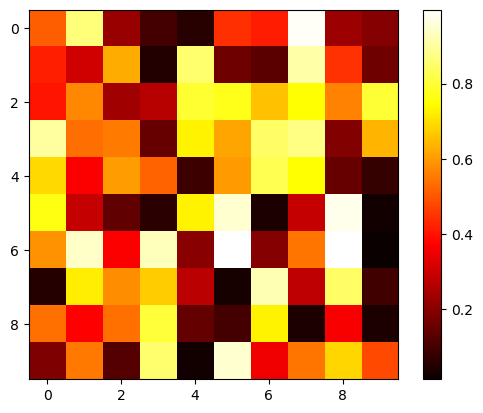

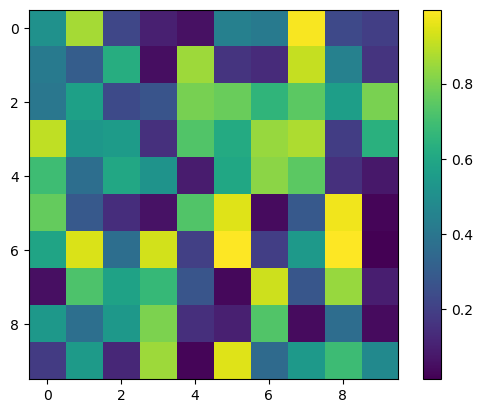

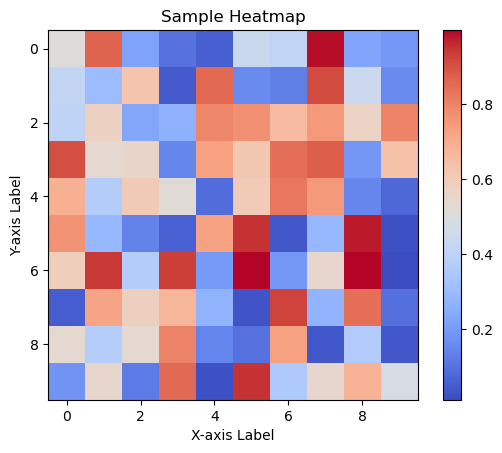

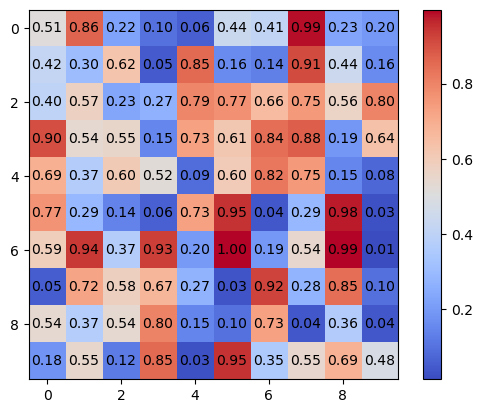

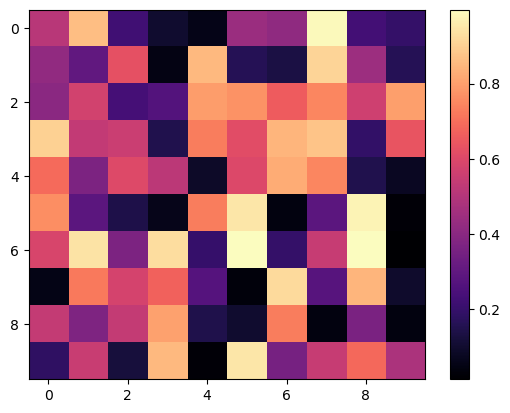

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = np.random.rand(10, 10)  # 10x10 matrix of random numbers
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add a colorbar to provide a scale
plt.show()

plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(data, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Add labels
plt.title('Sample Heatmap')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.show()

fig, ax = plt.subplots()
cax = ax.imshow(data, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

# Annotate cells
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()
plt.imshow(data, cmap='magma', interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

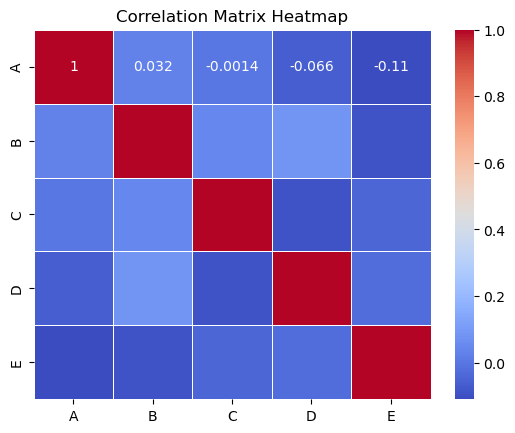

          A         B         C         D         E
A  1.000000  0.032010 -0.001403 -0.065629 -0.110074
B  0.032010  1.000000  0.043327  0.081222 -0.090521
C -0.001403  0.043327  1.000000 -0.088395 -0.041784
D -0.065629  0.081222 -0.088395  1.000000 -0.024667
E -0.110074 -0.090521 -0.041784 -0.024667  1.000000


In [46]:
import seaborn as sns
import pandas as pd

# Generate a sample DataFrame
data = pd.DataFrame(np.random.randn(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Compute the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
print(corr_matrix)

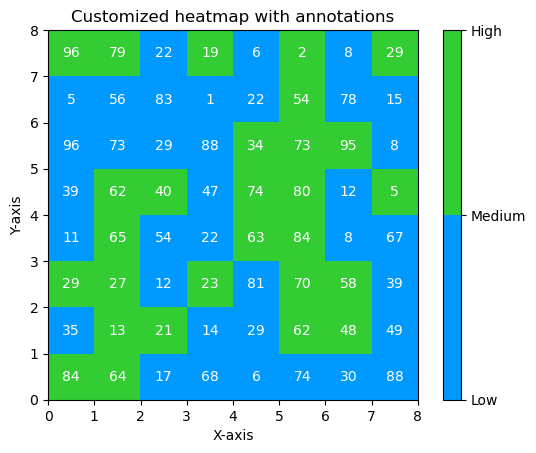

In [48]:
import matplotlib.colors as colors 

# Generate random data 
data = np.random.randint(0, 100, size=(8, 8)) 

# Create a custom color map 
# with blue and green colors 
colors_list = ['#0099ff', '#33cc33'] 
cmap = colors.ListedColormap(colors_list) 

# Plot the heatmap with custom colors and annotations 
plt.imshow(data, cmap=cmap, vmin=0, 
		vmax=100, extent=[0, 8, 0, 8]) 
for i in range(8): 
	for j in range(8): 
		plt.annotate(str(data[i][j]), xy=(j+0.5, i+0.5), 
					ha='center', va='center', color='white') 

# Add colorbar 
cbar = plt.colorbar(ticks=[0, 50, 100]) 
cbar.ax.set_yticklabels(['Low', 'Medium', 'High']) 

# Set plot title and axis labels 
plt.title("Customized heatmap with annotations") 
plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 

# Display the plot 
plt.show() 


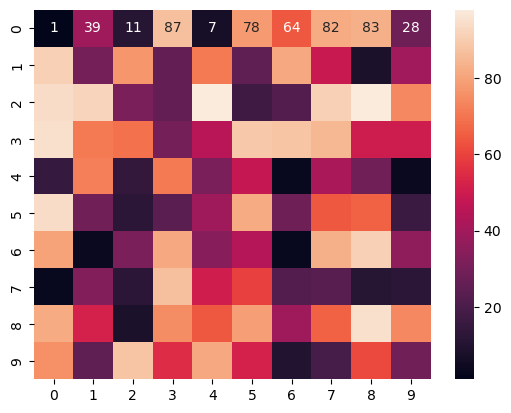

In [52]:
# importing the modules 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
	
# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = np.random.randint(low=1, 
						high=100, 
						size=(10, 10)) 
	
# plotting the heatmap 
hm = sns.heatmap(data=data, 
				annot=True) 
	
# displaying the plotted heatmap 
plt.show()
